In [68]:
import cv2 as cv
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt


plt.rcParams['figure.figsize'] = [25, 25]


In [90]:
root_dir = "skin-cancer-mnist-ham10000"
metadata = 'HAM10000_metadata.csv'
df = pd.read_csv("{}/{}".format(root_dir, metadata)).sample(frac=1)
print(df.head())

        lesion_id      image_id   dx    dx_type   age     sex localization
5820  HAM_0004955  ISIC_0027128   nv  follow_up  45.0    male        trunk
562   HAM_0004125  ISIC_0027437  bkl      histo  65.0  female         neck
2178  HAM_0006699  ISIC_0029893  mel      histo  65.0    male         face
8914  HAM_0000311  ISIC_0028205   nv      histo  45.0    male         back
7469  HAM_0000547  ISIC_0033222   nv      histo  55.0    male         back


In [91]:
dx_dictionary = {
    "bcc": "basal cell carcinoma",
    "akiec":"Actinic keratoses and intraepithelial carcinoma / Bowen's disease",
    "bkl": "benign keratosis-like lesions",
    "df":"dermatofibroma",
    "mel":"melanoma",
    "nv":"melanocytic nevi",
    "vasc":"vascular lesions"
}

In [92]:
diagnoses = df.dx.unique()
dfs_dict = {}


for diagnosis in diagnoses:
    dfs_dict[diagnosis] = list(df[df['dx'] == diagnosis][:10].image_id)


<Figure size 576x576 with 0 Axes>

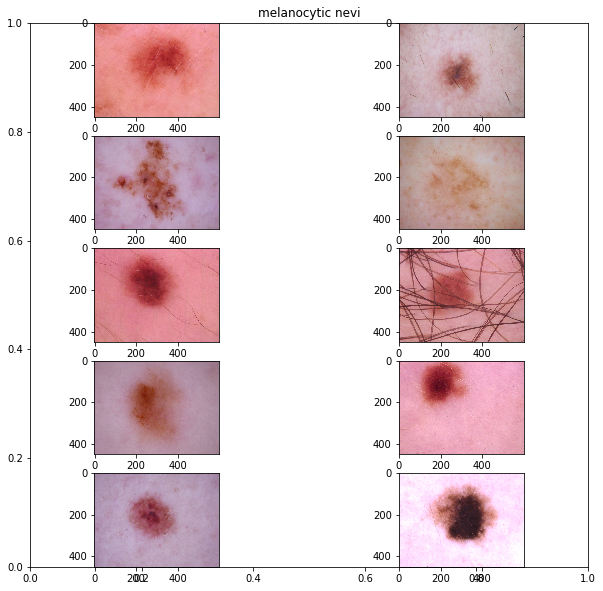

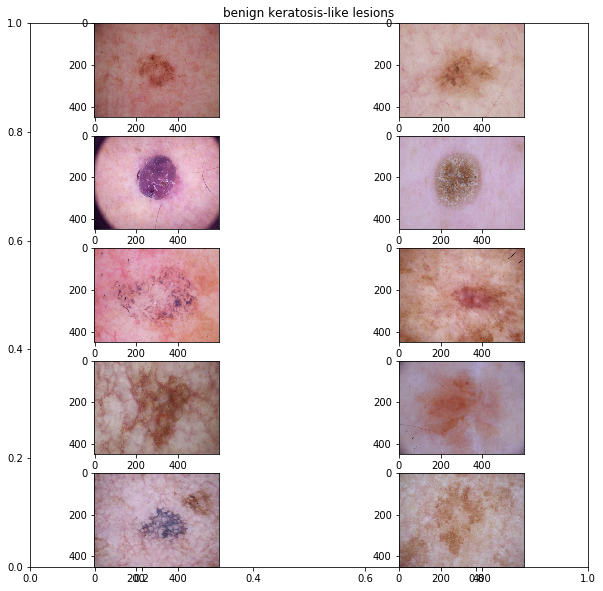

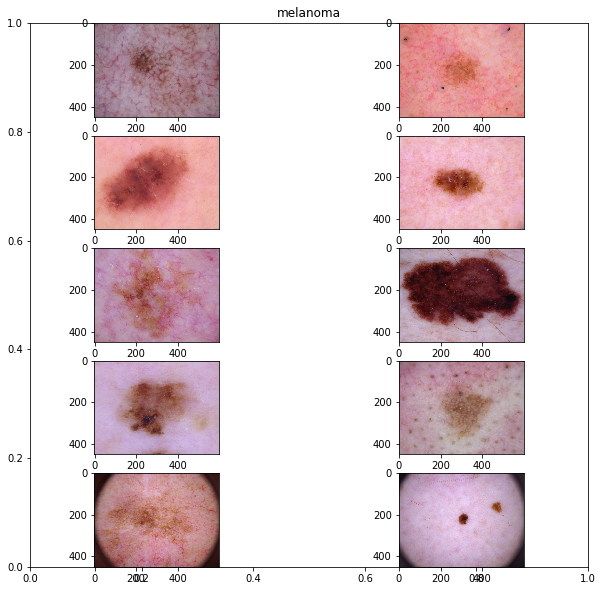

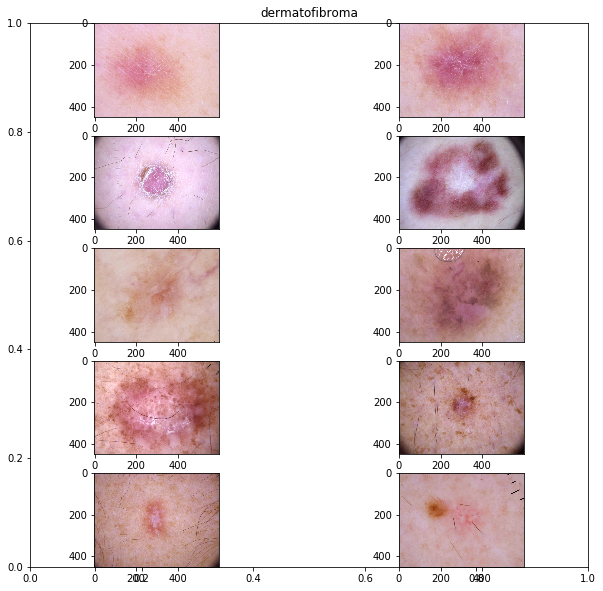

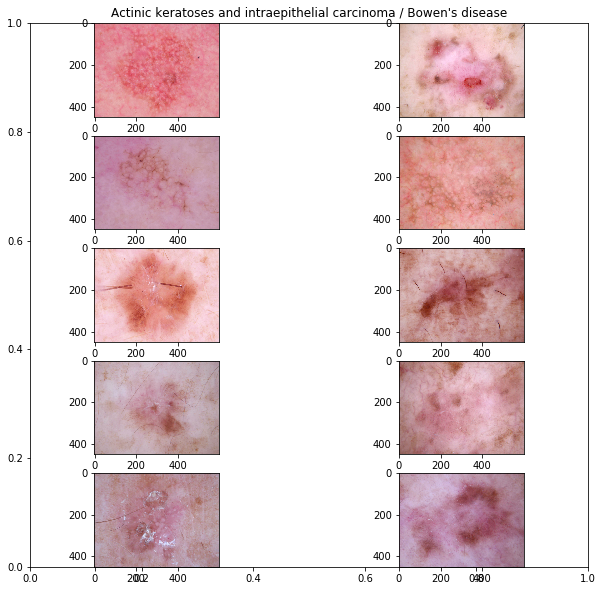

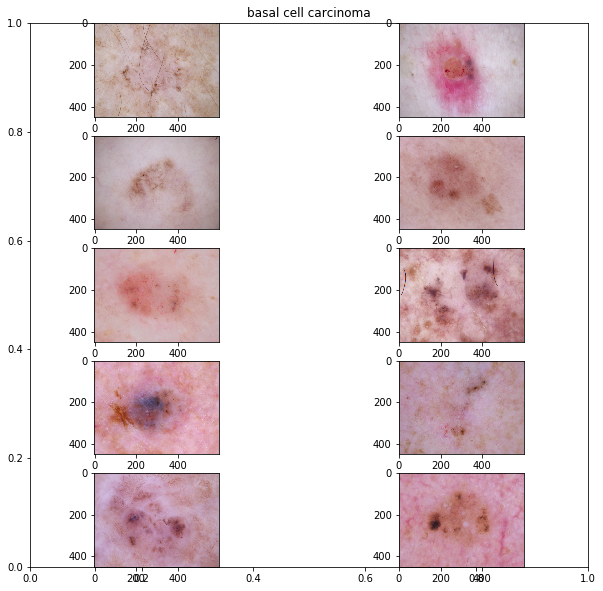

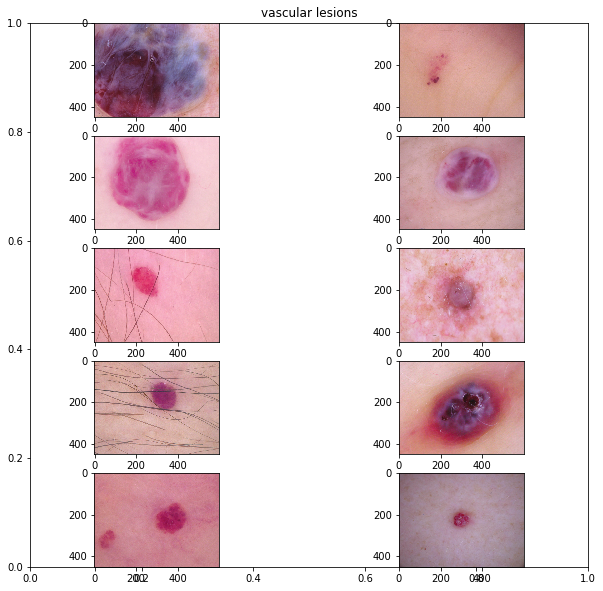

In [95]:
def get_file(filename):
    directories = os.listdir(root_dir)
    directory = None
    for i in directories:
        if "." not in i and "{}.jpg".format(filename) in os.listdir("{}/{}".format(root_dir, i)):
            directory = i
            
    img = cv.cvtColor(cv.imread("{}/{}/{}.jpg".format(root_dir, directory, filename)), cv.COLOR_BGR2RGB)
    return img


w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 1
rows = 7
for  index, key in enumerate(dfs_dict):
    our_fig = plt.figure(figsize=(10, 10))
    plt.title(dx_dictionary[key])
    columns_ = 2
    rows_ = 5
    for j, img_name in enumerate(dfs_dict[key]):
        img = get_file(img_name)
        our_fig.add_subplot(rows_, columns_, j+1)
        plt.imshow(img)
plt.show()